Problem Statement: To build a machine learning model that predicts the selling price of used cars based on features like year, present price, kilometers driven, fuel type, seller type, transmission type, and number of owners.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data["Car Age"]= 2025-data["Year"]

In [8]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [9]:
data.drop('Year', axis=1,inplace=True)

In [10]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [11]:
data.drop('Car_Name',axis=1,inplace=True)

In [12]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


EDA

TO CHECK IF TARGET VARIABLE IS SKEWED OR NOT

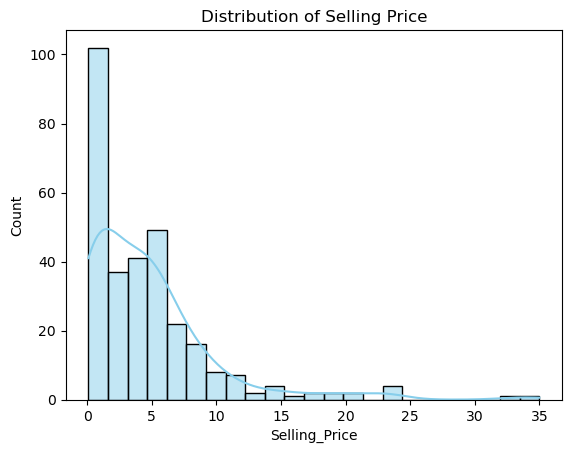

In [13]:
sns.histplot(data['Selling_Price'], kde=True, color='skyblue')
plt.title('Distribution of Selling Price')
plt.show()


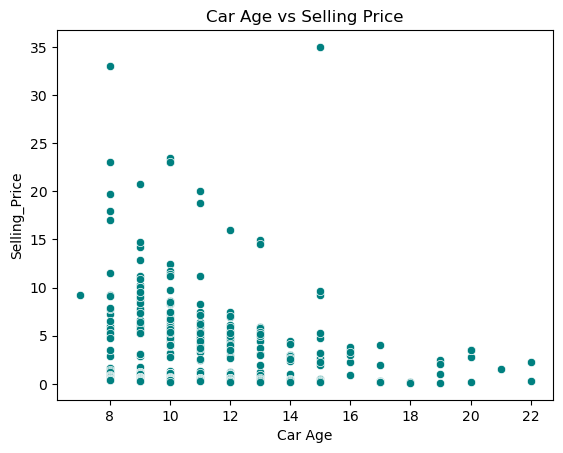

In [14]:
sns.scatterplot(x='Car Age', y='Selling_Price', data=data, color='teal')
plt.title('Car Age vs Selling Price')
plt.show()


There is a clear negative relationship between car age and selling price — as the car gets older, its selling price decreases.

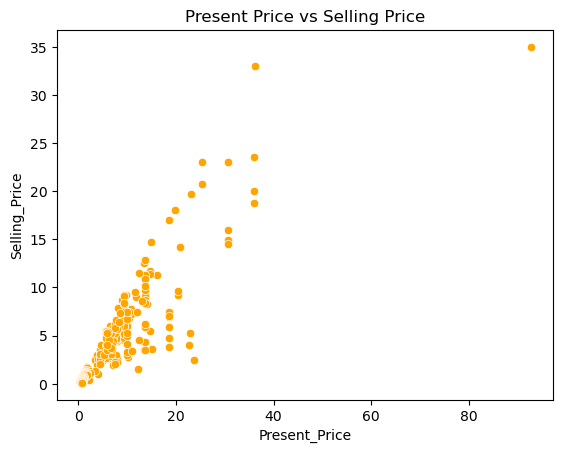

In [25]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data, color='orange')
plt.title('Present Price vs Selling Price')
plt.show()


The majority of cars have low present and selling prices, indicating a concentration of budget models. However, a clear positive trend shows that cars with higher present prices also sell for higher resale values.

C:\Users\APARNA\AppData\Local\Temp\ipykernel_15120\1122142528.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette='Set2')


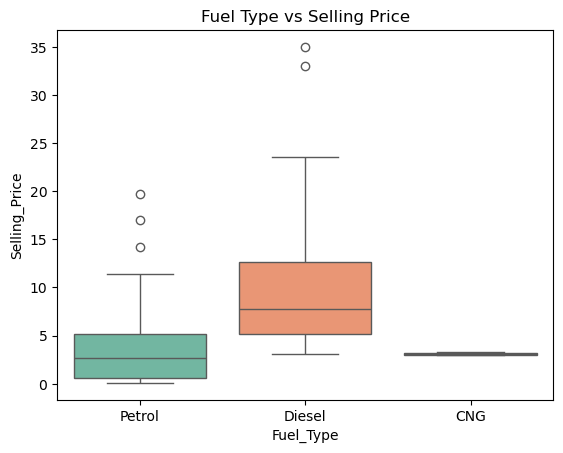

In [26]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette='Set2')
plt.title('Fuel Type vs Selling Price')
plt.show()


Diesel cars generally have higher resale (selling) prices than petrol and CNG cars.
The wider range for diesel vehicles indicates they include both mid-range and premium models.
Petrol cars dominate the lower price segment with a smaller variation, while CNG cars are least expensive, showing minimal resale value.

C:\Users\APARNA\AppData\Local\Temp\ipykernel_15120\300251379.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Selling_Price', data=data, palette='cool')


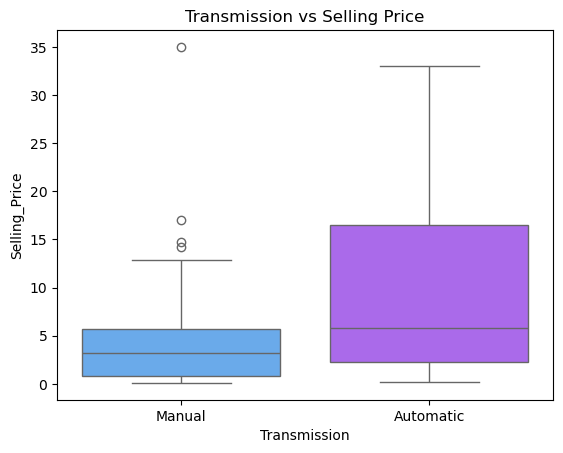

In [27]:
sns.boxplot(x='Transmission', y='Selling_Price', data=data, palette='cool')
plt.title('Transmission vs Selling Price')
plt.show()


Automatic cars tend to have higher resale prices than manual cars.
This suggests that automatic transmission cars are generally newer or belong to premium segments.
Manual cars dominate the lower price range, indicating higher availability and depreciation.

In [18]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


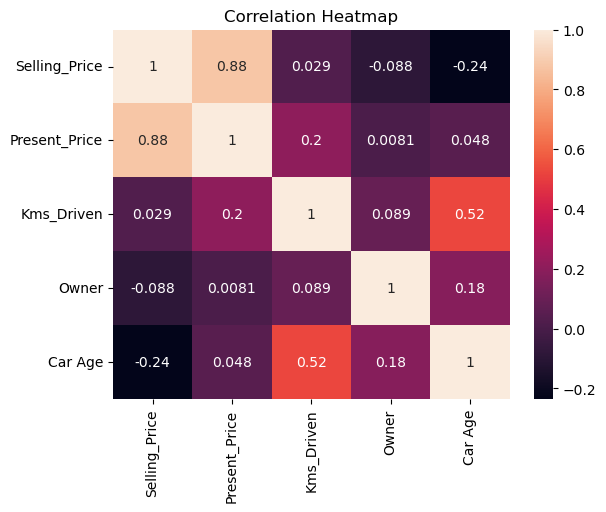

In [28]:
sns.heatmap(data.drop([ "Fuel_Type", "Seller_Type","Transmission"],axis=1).corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()


Present Price has a very strong positive correlation with Selling Price (0.88)
Car Age has a moderate negative correlation with Selling Price.As the age of the car increases, the selling price decreases.
Kms Driven has almost no correlation with Selling Price (0.02)
Car Age and Kms Driven have a moderate positive correlation (0.52)
Owner count has almost zero correlation with Selling Price (-0.08)

PRE-PROCESSING

In [29]:
data_encoded = pd.get_dummies(data, columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True, dtype=int)

In [30]:
data_encoded.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,0,1,0,1
1,4.75,9.54,43000,0,12,1,0,0,1
2,7.25,9.85,6900,0,8,0,1,0,1
3,2.85,4.15,5200,0,14,0,1,0,1
4,4.60,6.87,42450,0,11,1,0,0,1


LINEAR REGRESSION

In [ ]:
Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Selling_Price', axis=1)
y = data_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X

,Present_Price,Kms_Driven,Owner,Car Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,11,0,1,0,1
1,9.54,43000,0,12,1,0,0,1
2,9.85,6900,0,8,0,1,0,1
3,4.15,5200,0,14,0,1,0,1
4,6.87,42450,0,11,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,9,1,0,0,1
297,5.90,60000,0,10,0,1,0,1
298,11.00,87934,0,16,0,1,0,1
299,12.50,9000,0,8,1,0,0,1


In [33]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np

# # Create and train model
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Predictions
# y_pred = lr.predict(X_test)

# # Evaluate
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print("Linear Regression Results:")
# print("R² Score:", r2)
# print("MAE:", mae)
# print("RMSE:", rmse)


R² = 0.85 means the model explains 85% of the variation in car prices.
Lower MAE and RMSE indicate predictions are close to actual selling prices.
MAE (Mean Absolute Error): 1.22
On average,  predictions are off by only about ₹1.2 lakhs (if price is in lakhs) — quite accurate.
RMSE (Root Mean Squared Error):1.86
Slightly higher than MAE because it penalizes bigger errors, but still low.

In [ ]:
# y_pred

In [ ]:
# y_test

In [ ]:
# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_pred, color='teal')
# plt.xlabel("Actual Selling Price")
# plt.ylabel("Predicted Selling Price")
# plt.title("Actual vs Predicted Selling Price (Linear Regression)")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
# plt.show()


In [ ]:
RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Results:")
print("R² Score:", r2_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)


Random Forest Results:
R² Score: 0.9599938850484411
MAE: 0.63872131147541
RMSE: 0.9599813760147025


R² Score 0.96:	The model explains ≈96% of the variation in the selling price. That’s an excellent fit — only 4% of variation is unexplained.
MAE	0.64:	On average, your predictions differ from the actual car price by just ₹0.64 lakhs — very small error.
RMSE 0.96:	Indicates that most predictions are within ±₹1 lakh of the true value, even when large errors are penalized.

HYPERPARAMETER TUNING

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R²:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best R²: 0.8827113850109235


The untuned model memorized data (overfit).
The tuned model actually learned patterns (better generalization). So like thats why r2 score reduced.

In [40]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(r2, mae, rmse)


0.9607960656041649 0.6279147085030061 0.9503081312412175


After hyperparameter tuning, the Random Forest model achieved an R² score of 0.88 using cross-validation. Although this is slightly lower than the untuned model’s 0.95, it indicates a more realistic and generalizable performance. The untuned model likely overfit the training data, while the tuned model provides a more balanced trade-off between bias and variance. The best parameters (max_depth=10, n_estimators=300) help control model complexity and improve reliability on unseen data.

In [ ]:
CONCLUSION

Both Linear Regression and Random Forest Regressor were trained to predict car selling prices.
Linear Regression gave an R² score of 0.85, while Random Forest performed much better with an R² of 0.96, a MAE of 0.63, and a RMSE of 0.95.

After hyperparameter tuning, the Random Forest model continued to perform strongly, showing that it generalizes well on unseen data and is not overfitting.

Overall, the Random Forest model is the best model for this dataset because it captures non-linear relationships between car features and price, provides very accurate predictions, and maintains low error values.

Hence, the final chosen model for car price prediction is Random Forest Regressor with the tuned parameters.

In [41]:
import pickle
#open a file,where you want to store the data
file=open('random_forest_regression_model.pkl','wb')
#dump information to that file
pickle.dump(rf,file)